In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
features = iris.feature_names  # Names of the features

In [7]:
iris_df = pd.DataFrame(data=data, columns=features)


In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df['sepal length (cm)'].describe()

,sepal length (cm)
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


In [10]:
sampled_iris = iris_df.sample(n=30, random_state=12)
sampled_iris.reset_index(drop=True, inplace=True)
sampled_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.5,1.3,0.3
1,6.3,2.5,5.0,1.9
2,4.4,3.0,1.3,0.2
3,5.7,2.8,4.1,1.3
4,6.8,3.2,5.9,2.3


In [35]:
import numpy as np
import pandas as pd

def clt_sampling(df, column_name, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column_name].sample(n=sample_size, replace=True)  # Sample with replacement
        sample_means.append(sample.mean())
    return sample_means

# Assuming 'iris_df' is your DataFrame
column_to_sample = 'sepal length (cm)'  # Choose the column you want to sample
sample_size = 30  # Size of each sample
num_samples = 100  # Number of samples to generate

# Apply CLT sampling
sampled_means = clt_sampling(iris_df, column_to_sample, sample_size, num_samples)

# Now 'sampled_means' contains the list of sample means
# You can further analyze or visualize this data

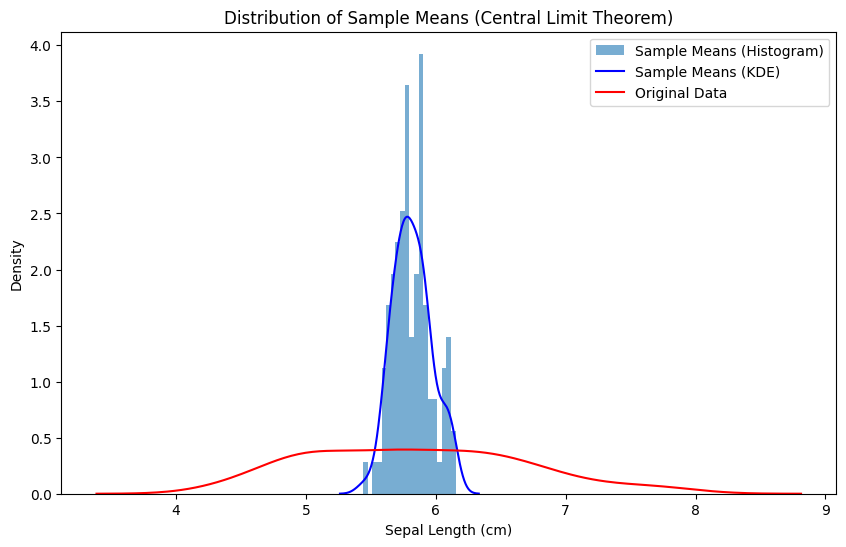

In [36]:
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(sampled_means, bins=20, density=True, alpha=0.6, label='Sample Means (Histogram)')

# KDE Plot
sns.kdeplot(sampled_means, color='blue', label='Sample Means (KDE)')

# Original Data Distribution (for comparison)
sns.kdeplot(iris_df[column_to_sample], color='red', label='Original Data')

plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.legend()
plt.show()

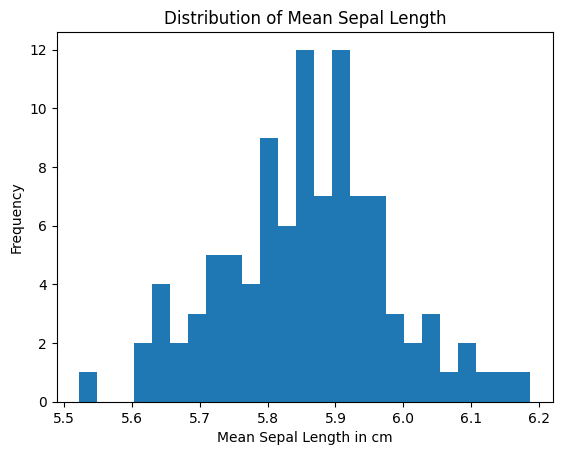

In [19]:
#Random Sampling
sepal_length_means = []
for i in range(100):
  sample = iris_df.sample(n=30, random_state=i)
  sepal_length_means.append(sample['sepal length (cm)'].mean())

plt.hist(sepal_length_means, bins=25)
plt.title('Distribution of Mean Sepal Length')
plt.xlabel('Mean Sepal Length in cm')
plt.ylabel('Frequency')
plt.show()

In [22]:
import numpy as np

def custom_sampling(df, fraction):
    num_samples = int(len(df) * fraction)
    sampled_indices = np.random.choice(df.index, size=num_samples, replace=True)
    return df.loc[sampled_indices]

def generate_sepal_length(df, min_value=5.843333, max_value=7.900000):
    generated_value = np.random.uniform(min_value, max_value)
    closest_value = df['sepal length (cm)'].iloc[(df['sepal length (cm)'] - generated_value).abs().argsort()[0]]
    return closest_value

# Apply the sampling method to get 20% of the data
sampled_data = custom_sampling(iris_df, 0.2)

# Apply the sepal length generation method to the sampled data
sampled_data['generated_sepal_length'] = sampled_data.apply(lambda row: generate_sepal_length(iris_df), axis=1)

In [29]:
sampled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),generated_sepal_length
96,5.7,2.9,4.2,1.3,6.7
117,7.7,3.8,6.7,2.2,5.9
92,5.8,2.6,4.0,1.2,6.0
72,6.3,2.5,4.9,1.5,7.2
53,5.5,2.3,4.0,1.3,7.1


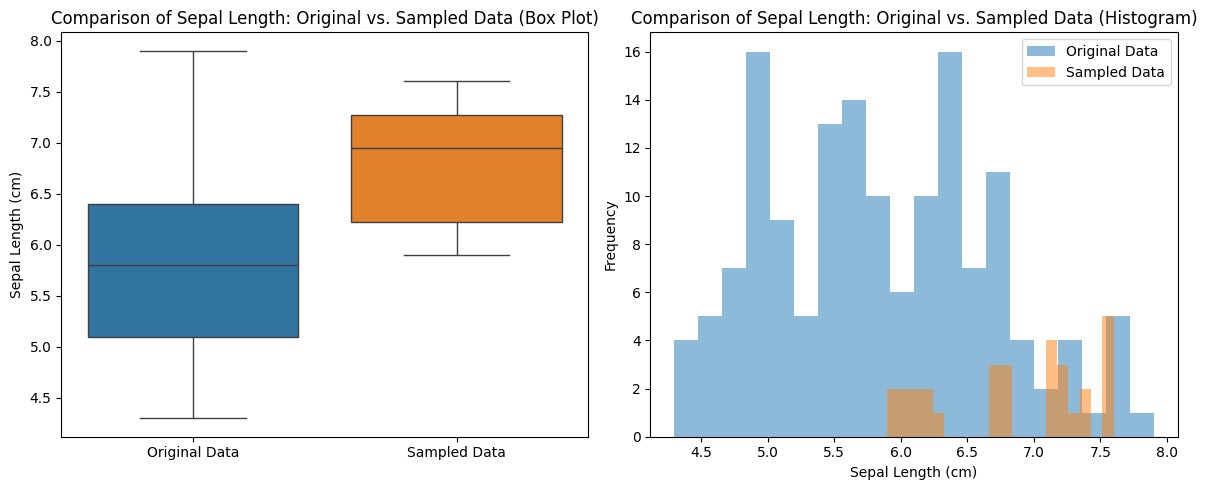

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data for plotting, resetting index of sampled_data to avoid duplicates
combined_data = pd.concat([
    iris_df['sepal length (cm)'].rename('Original Data'),
    sampled_data['generated_sepal_length'].rename('Sampled Data').reset_index(drop=True) # Reset index here
], axis=1)

# Create the box plot
plt.figure(figsize=(12, 5))  # Adjust figure size for both plots

plt.subplot(1, 2, 1)  # Create subplot for box plot
sns.boxplot(data=combined_data)
plt.title('Comparison of Sepal Length: Original vs. Sampled Data (Box Plot)')
plt.ylabel('Sepal Length (cm)')

plt.subplot(1, 2, 2)  # Create subplot for histogram
plt.hist(iris_df['sepal length (cm)'], bins=20, alpha=0.5, label='Original Data')
plt.hist(sampled_data['generated_sepal_length'], bins=20, alpha=0.5, label='Sampled Data')
plt.title('Comparison of Sepal Length: Original vs. Sampled Data (Histogram)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [34]:
import pandas as pd

# Export to CSV
sampled_data.to_csv('sampled_iris_data.csv', index=False)